### 1. 날짜별 승차 및 하차 인원 분석
날짜별로 승차 및 하차 인원을 집계하고, 상위 5일의 데이터를 표시하겠습니다.

In [1]:
import pandas as pd

df = pd.read_csv('인천교통공사_1호선 일별 승하차현황_20240630.csv', header=0)
df.head()

,역명,일자,이용인원,승차인원,하차인원
0,계양,2023-06-01,8360,4264,4096
1,귤현,2023-06-01,2793,1084,1709
2,박촌,2023-06-01,7998,4206,3792
3,임학,2023-06-01,16947,8552,8395
4,계산,2023-06-01,23140,11764,11376


In [2]:
# 날짜 데이터 타입으로 변경
df['일자'] = pd.to_datetime(df['일자'])
print(df['일자'][0:2])

0   2023-06-01
1   2023-06-01
Name: 일자, dtype: datetime64[ns]


In [3]:
# 2023-06-01 데이터 확인하기 
# print(data.iloc[0:29, 0:5])
# print(data.loc[0:29, '역명':'하차인원'])
one_day = df.loc[0:29, '역명':'하차인원']
# print(one_day)

sum1 = one_day['승차인원'].sum()
sum2 = one_day['하차인원'].sum()
print(sum1, sum2)

219938 217187


In [4]:
# 일자를 인덱스로 설정
df = df.set_index('일자')
print(df.head())

            역명   이용인원   승차인원   하차인원
일자                                 
2023-06-01  계양   8360   4264   4096
2023-06-01  귤현   2793   1084   1709
2023-06-01  박촌   7998   4206   3792
2023-06-01  임학  16947   8552   8395
2023-06-01  계산  23140  11764  11376


In [5]:
# 날짜별로 그룹화하여 총 승차인원 and 하차인원 계산
daily_stats = df.groupby('일자')[['승차인원', '하차인원']].sum()
print(daily_stats.head())

              승차인원    하차인원
일자                        
2023-06-01  219938  217187
2023-06-02  226864  224479
2023-06-03  172745  171941
2023-06-04  129082  128686
2023-06-05  200526  198122


In [6]:
# 일자별 승차인원 상위 5개
day_top5_get_on = daily_stats.sort_values(by='승차인원', ascending=False).head()
print(day_top5_get_on)

              승차인원    하차인원
일자                        
2024-05-03  242122  240857
2024-05-14  239222  236939
2024-05-24  237051  235638
2024-04-26  233850  232073
2024-06-05  232677  230915


In [9]:
date = input("Enter the date (YYYY-MM-DD): ")
passengers_get_on = daily_stats.loc[date, '승차인원']
passengers_get_off = daily_stats.loc[date, '하차인원']
print(f"{date}의 승차인원: {passengers_get_on} 명")
print(f"{date}의 하치인원: {passengers_get_off} 명")

2024-04-20의 승차인원: 151879 명
2024-04-20의 하치인원: 150855 명


In [10]:
# 인덱스 해제하기 
df = df.reset_index()
print(df.head())

          일자  역명   이용인원   승차인원   하차인원
0 2023-06-01  계양   8360   4264   4096
1 2023-06-01  귤현   2793   1084   1709
2 2023-06-01  박촌   7998   4206   3792
3 2023-06-01  임학  16947   8552   8395
4 2023-06-01  계산  23140  11764  11376


In [11]:
# 일자로 부터 새로운 '월' 컬럼 추가하기
df['월'] = df['일자'].dt.to_period('M')
print(df.head())

          일자  역명   이용인원   승차인원   하차인원        월
0 2023-06-01  계양   8360   4264   4096  2023-06
1 2023-06-01  귤현   2793   1084   1709  2023-06
2 2023-06-01  박촌   7998   4206   3792  2023-06
3 2023-06-01  임학  16947   8552   8395  2023-06
4 2023-06-01  계산  23140  11764  11376  2023-06


In [13]:
# 월별로 그룹화하여 총 승차인원 and 하차인원 계산
monthly_stats = df.groupby('월')[['승차인원', '하차인원']].sum().reset_index()
print(monthly_stats)

          월     승차인원     하차인원
0   2023-06  5677564  5627311
1   2023-07  5462873  5411578
2   2023-08  5389670  5353541
3   2023-09  5563959  5512548
4   2023-10  5788173  5736334
5   2023-11  5686852  5633143
6   2023-12  5604019  5560245
7   2024-01  5401094  5360521
8   2024-02  5012240  4974018
9   2024-03  5882913  5832939
10  2024-04  5959040  5910593
11  2024-05  6118786  6067848
12  2024-06  5602824  5559089


In [18]:
month = input("Enter the month (YYYY-MM): ")
passengers_get_on = monthly_stats.loc[monthly_stats['월'] == month, '승차인원'].values[0]
passengers_get_off = monthly_stats.loc[monthly_stats['월'] == month, '하차인원'].values[0]
print(f"{month}의 승차인원: {passengers_get_on} 명")
print(f"{month}의 하차인원: {passengers_get_off} 명")

2024-01의 승차인원: 5401094 명
2024-01의 하차인원: 5360521 명


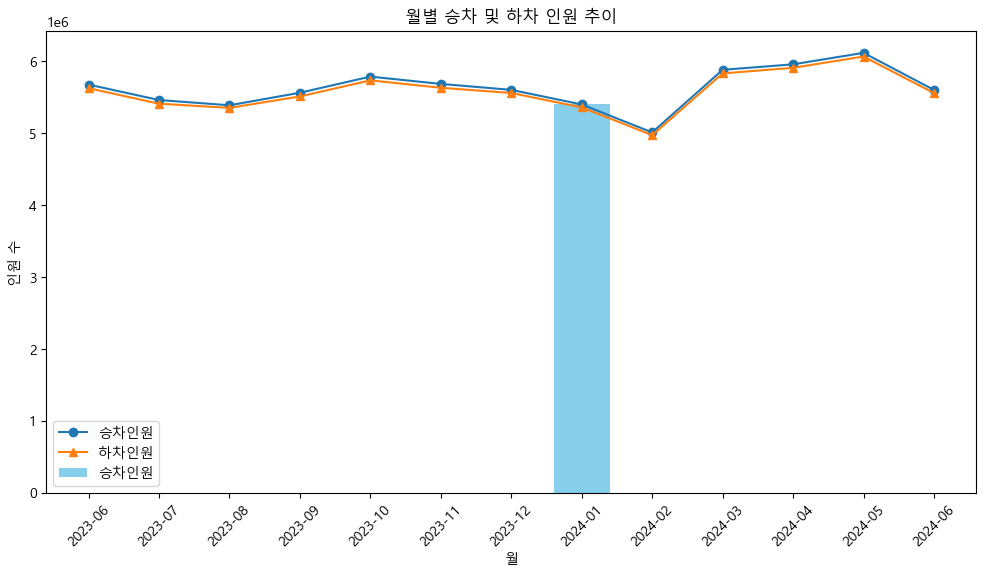

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 예시
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['월'].astype(str), monthly_stats['승차인원'], marker='o', label='승차인원')
plt.plot(monthly_stats['월'].astype(str), monthly_stats['하차인원'], marker='^', label='하차인원')
plt.bar(month, passengers_get_on, label='승차인원', color='skyblue')
plt.title('월별 승차 및 하차 인원 추이')
plt.xlabel('월')
plt.ylabel('인원 수')
plt.legend()
# plt.ylim(4000000, 7000000)
plt.xticks(rotation=45)
plt.show()